# Orthogonal Matrices — The "Perfect" Linear Transformations

**Why should you care?** Imagine you're a computer graphics programmer rotating objects in 3D space, or a data scientist doing principal component analysis. In both cases, you want transformations that preserve distances and angles — essentially transformations that don't "distort" your data. These are exactly what orthogonal matrices provide!

**The key insight:** If a transformation's columns form an **orthonormal basis** (perpendicular unit vectors), the transformation matrix is **orthogonal**. This gives us the beautiful property:

$$A^T A = I \quad\Rightarrow\quad A^{-1} = A^T$$

**Why this matters:**
- 🎯 **Easy inverse**: Just transpose! No expensive computation needed
- 📏 **Length preservation**: Distances stay the same after transformation  
- 📐 **Angle preservation**: Shapes don't get distorted
- 🔢 **Numerical stability**: Great for computer algorithms

**Real-world applications:**
- Computer graphics (rotations, reflections)
- Principal Component Analysis (PCA)
- QR decomposition in linear algebra
- Signal processing (Fourier transforms)
- Machine learning (orthogonal weight initialization)


## Learning objectives
By the end you will be able to:
- Compute and interpret the **transpose** of a matrix.
- Recognize **orthonormal** sets and **orthogonal** matrices.
- Verify \(A^\top A = I\) and conclude \(A^{-1} = A^\top\).
- Explain why orthogonal matrices preserve **lengths** and **angles**.
- Understand why **det(A) = ±1** for orthogonal matrices.
- Use dot products as **coordinates** in an orthonormal basis.


## 🎨 Visual Intuition: What Makes a Matrix "Orthogonal"?

Think of an orthogonal matrix as a transformation that:
- **Rotates** objects (like turning a photo)
- **Reflects** objects (like looking in a mirror)  
- **Combines both** (rotate then flip)

But it **never**:
- Stretches or shrinks
- Skews or shears
- Changes angles between lines

The mathematical way to ensure this "rigidity" is to make the transformation's columns **orthonormal**:
- Each column is a **unit vector** (length = 1)
- All columns are **perpendicular** to each other

Let's see this in action!

In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
print("Libraries ready.")


Libraries ready.


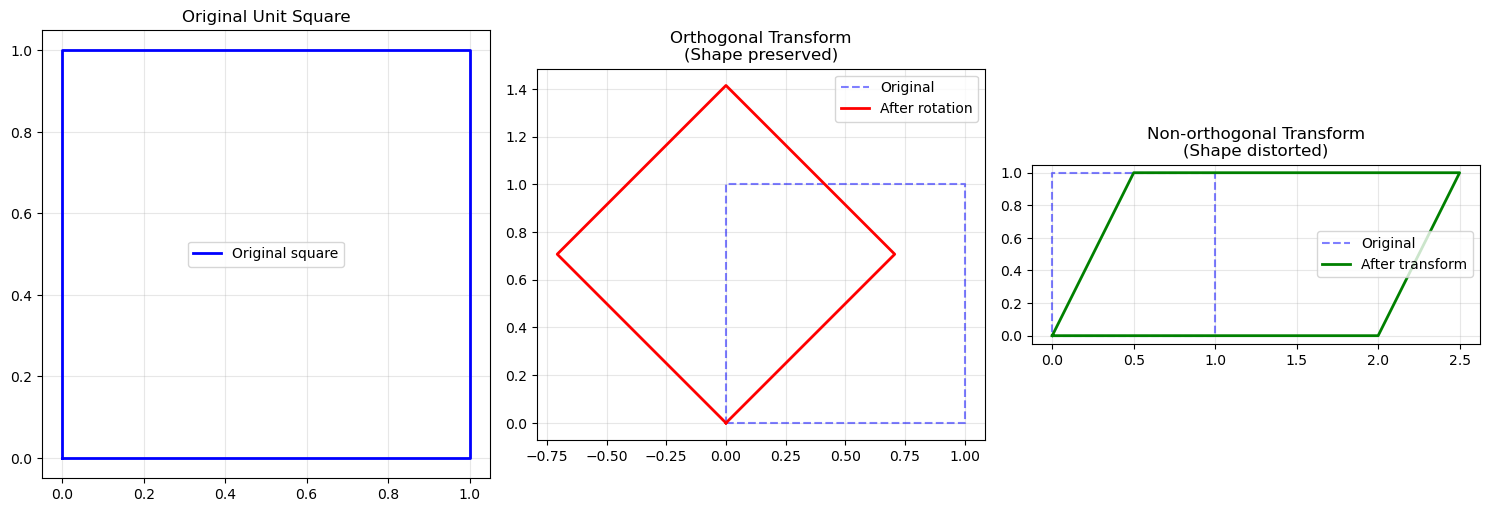

Notice: Orthogonal transformation preserves shape and size!
Non-orthogonal transformation stretches and skews the shape.


In [4]:
# Quick demonstration: Orthogonal vs Non-orthogonal transformations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original unit square
square = np.array([[0, 1, 1, 0, 0],
                   [0, 0, 1, 1, 0]])

# 1. Orthogonal transformation (rotation)
theta = np.pi/4  # 45 degrees
R_orthogonal = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta),  np.cos(theta)]])
square_rotated = R_orthogonal @ square

# 2. Non-orthogonal transformation (stretch and skew)
A_nonorthogonal = np.array([[2, 0.5],
                           [0, 1]])
square_transformed = A_nonorthogonal @ square

# Plot original
ax1.plot(square[0], square[1], 'b-', linewidth=2, label='Original square')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.set_title('Original Unit Square')
ax1.legend()

# Plot orthogonal transformation
ax2.plot(square[0], square[1], 'b--', alpha=0.5, label='Original')
ax2.plot(square_rotated[0], square_rotated[1], 'r-', linewidth=2, label='After rotation')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_title('Orthogonal Transform\n(Shape preserved)')
ax2.legend()

# Plot non-orthogonal transformation
ax3.plot(square[0], square[1], 'b--', alpha=0.5, label='Original')
ax3.plot(square_transformed[0], square_transformed[1], 'g-', linewidth=2, label='After transform')
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')
ax3.set_title('Non-orthogonal Transform\n(Shape distorted)')
ax3.legend()

plt.tight_layout()
plt.show()

print("Notice: Orthogonal transformation preserves shape and size!")
print("Non-orthogonal transformation stretches and skews the shape.")

## 1) Matrix Transpose: Flipping Rows and Columns

The **transpose** of matrix $A$ (written as $A^T$) simply swaps rows and columns:
$$\boxed{(A^T)_{ij} = A_{ji}}$$

**Intuitive way to think about it:** 
- The first **row** of $A$ becomes the first **column** of $A^T$
- The second **row** of $A$ becomes the second **column** of $A^T$
- And so on...

**Example:** For a 2×2 matrix:
$$A = \begin{bmatrix}1 & 2\\ 3 & 4\end{bmatrix} \quad\Rightarrow\quad A^T = \begin{bmatrix}1 & 3\\ 2 & 4\end{bmatrix}$$

**Why is transpose important for orthogonal matrices?** 
The transpose will become the **inverse** of an orthogonal matrix — a remarkable property we'll explore next!

In [2]:

A = np.array([[1, 2],
              [3, 4]], dtype=float)
print("A =\n", A)
print("A^T =\n", A.T)


A =
 [[1. 2.]
 [3. 4.]]
A^T =
 [[1. 3.]
 [2. 4.]]


## 2) The Magic Recipe: Orthonormal Columns ⇒ Orthogonal Matrix

**The key insight:** If the columns of matrix $A$ satisfy two simple conditions, something magical happens!

**Condition 1 - Orthogonal (perpendicular):** Different columns are perpendicular
$$a_i^T a_j = 0 \text{ whenever } i \neq j$$

**Condition 2 - Normal (unit length):** Each column has length 1
$$a_i^T a_i = 1 \text{ for all } i$$

**The magic result:** When both conditions hold, we get:
$$\boxed{A^T A = I \quad\Rightarrow\quad A^{-1} = A^T}$$

**Why is this amazing?**
- Finding the inverse usually requires expensive computation
- But for orthogonal matrices, the inverse is just the transpose!
- This makes many algorithms much faster and more stable

**Geometric intuition:** Think of the columns as the new coordinate system axes. If they're perpendicular and unit-length, it's a "rigid" coordinate system that doesn't distort anything.

In [5]:
# Function to check if matrix columns are orthonormal
def has_orthonormal_columns(A, tolerance=1e-9):
    """
    Check if matrix A has orthonormal columns by computing A^T A
    
    Returns:
    - is_orthonormal: True if A^T A ≈ I
    - gram_matrix: The actual A^T A matrix (called Gram matrix)
    """
    gram_matrix = A.T @ A
    identity = np.eye(A.shape[1])
    is_orthonormal = np.allclose(gram_matrix, identity, atol=tolerance)
    return is_orthonormal, gram_matrix

# Example: 2D rotation matrix (rotate by 35 degrees)
angle_deg = 35
theta = np.deg2rad(angle_deg)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

print(f"R = rotation matrix ({angle_deg}°)")
print(R)

# Check if columns are orthonormal
is_orthonormal, gram_matrix = has_orthonormal_columns(R)
print(f"\nGram matrix (R^T R) =")
print(gram_matrix)
print(f"\nColumns are orthonormal? {is_orthonormal}")

# Verify that inverse equals transpose
R_inverse = np.linalg.inv(R)
inverse_equals_transpose = np.allclose(R_inverse, R.T)
print(f"R^(-1) equals R^T? {inverse_equals_transpose}")

# Let's see the actual values
print(f"\nR^(-1) =")
print(R_inverse)
print(f"\nR^T =")
print(R.T)
print(f"\nDifference |R^(-1) - R^T| = {np.linalg.norm(R_inverse - R.T):.2e}")

R = rotation matrix (35°)
[[ 0.8192 -0.5736]
 [ 0.5736  0.8192]]

Gram matrix (R^T R) =
[[ 1. -0.]
 [-0.  1.]]

Columns are orthonormal? True
R^(-1) equals R^T? True

R^(-1) =
[[ 0.8192  0.5736]
 [-0.5736  0.8192]]

R^T =
[[ 0.8192  0.5736]
 [-0.5736  0.8192]]

Difference |R^(-1) - R^T| = 1.11e-16


### 🎯 Key Insight: Rows Are Also Orthonormal!

**Here's a beautiful symmetry:** If the columns of $A$ are orthonormal, then the **rows** are also orthonormal!

**Mathematical proof:** Since $A^T A = I$, we can multiply both sides by $A$ on the right:
$$A^T A \cdot A = I \cdot A \quad\Rightarrow\quad A^T \cdot (A \cdot A) = A$$

But we also know that $(A^T A) A = A$, which means $A A^T A = A$. 
Since $A$ is invertible, we can conclude: $A A^T = I$.

**What this means:** 
- $A^T A = I$ ⟹ columns are orthonormal
- $A A^T = I$ ⟹ rows are orthonormal

**Geometric intuition:** An orthogonal matrix represents a rigid transformation that preserves the coordinate system structure in both directions!

In [ ]:
# Function to check if matrix rows are orthonormal
def has_orthonormal_rows(A, tolerance=1e-9):
    """Check if matrix A has orthonormal rows by computing A A^T"""
    gram_matrix_rows = A @ A.T
    identity = np.eye(A.shape[0])
    is_orthonormal = np.allclose(gram_matrix_rows, identity, atol=tolerance)
    return is_orthonormal, gram_matrix_rows

# Test with our rotation matrix
rows_orthonormal, gram_rows = has_orthonormal_rows(R)

print("Checking if rows are orthonormal:")
print(f"A A^T = (Gram matrix for rows)")
print(gram_rows)
print(f"\nRows are orthonormal? {rows_orthonormal}")

# Let's verify this makes sense by looking at the actual row vectors
print(f"\nRow 1 of R: {R[0,:]}")
print(f"Row 2 of R: {R[1,:]}")
print(f"Length of row 1: {np.linalg.norm(R[0,:]):.6f}")
print(f"Length of row 2: {np.linalg.norm(R[1,:]):.6f}")
print(f"Dot product of rows: {np.dot(R[0,:], R[1,:]):.6f}")

print("\n✅ Both rows have unit length and are perpendicular!")

## 3) Determinant tells us about Orientation: Always ±1

**Geometric meaning of determinant:** The determinant tells us how much a transformation changes areas/volumes.

**For orthogonal matrices:** Since they preserve lengths and angles, they must preserve areas too!
$$|\det(A)| = 1$$

**The sign matters:**
- $\det(A) = +1$ ⟹ **Proper rotation** (preserves orientation, "right-handed")
- $\det(A) = -1$ ⟹ **Improper rotation** (flips orientation, includes reflection)

**Intuitive examples:**
- 🔄 **Rotation**: Turn a clock hand ⟹ $\det = +1$
- 🪞 **Reflection**: Look in a mirror ⟹ $\det = -1$  
- 🔄🪞 **Rotation + Reflection**: Rotate then flip ⟹ $\det = -1$

**Why exactly ±1?** If $A^T A = I$, then:
$$\det(A^T A) = \det(I) = 1$$
$$\det(A^T) \cdot \det(A) = 1$$
$$\det(A)^2 = 1 \quad\Rightarrow\quad \det(A) = \pm 1$$

In [6]:
# Examples of orthogonal matrices with different determinants

# 1. Rotation matrix (det = +1)
angle_deg = 35
theta = np.deg2rad(angle_deg)
rotation = np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])

# 2. Reflection across x-axis (det = -1)
reflect_x = np.array([[1,  0],
                      [0, -1]])

# 3. Reflection across y-axis (det = -1)  
reflect_y = np.array([[-1, 0],
                      [ 0, 1]])

# 4. Reflection across line y=x (det = -1)
reflect_diagonal = np.array([[0, 1],
                            [1, 0]])

# Check determinants
matrices = [
    ("Rotation (35°)", rotation),
    ("Reflect across x-axis", reflect_x),
    ("Reflect across y-axis", reflect_y),
    ("Reflect across y=x", reflect_diagonal)
]

print("Determinants of orthogonal matrices:")
print("="*40)
for name, matrix in matrices:
    det = np.linalg.det(matrix)
    orientation = "preserves" if det > 0 else "flips"
    print(f"{name:25s}: det = {det:+6.3f} ({orientation} orientation)")

# Verify they're all orthogonal
print(f"\nVerifying all matrices are orthogonal (A^T A = I):")
print("="*50)
for name, matrix in matrices:
    is_orthogonal = np.allclose(matrix.T @ matrix, np.eye(2))
    print(f"{name:25s}: {is_orthogonal}")

Determinants of orthogonal matrices:
Rotation (35°)           : det = +1.000 (preserves orientation)
Reflect across x-axis    : det = -1.000 (flips orientation)
Reflect across y-axis    : det = -1.000 (flips orientation)
Reflect across y=x       : det = -1.000 (flips orientation)

Verifying all matrices are orthogonal (A^T A = I):
Rotation (35°)           : True
Reflect across x-axis    : True
Reflect across y-axis    : True
Reflect across y=x       : True


## 4) The Fundamental Property: Length and Angle Preservation

**This is what makes orthogonal matrices special!** They act like "rigid body transformations" — imagine moving a solid object without bending or stretching it.

### 📏 Length Preservation

For any vector $v$, the transformed vector $Av$ has the same length:
$$\|Av\| = \|v\|$$

**Proof:** Using the fact that $A^T A = I$:
$$\|Av\|^2 = (Av)^T (Av) = v^T A^T A v = v^T I v = v^T v = \|v\|^2$$

### 📐 Angle Preservation  

The angle between any two vectors $u$ and $v$ is the same as the angle between $Au$ and $Av$:
$$\cos(\angle(u,v)) = \cos(\angle(Au,Av))$$

**Proof:** The cosine of the angle is given by the normalized dot product:
$$(Au)^T (Av) = u^T A^T A v = u^T I v = u^T v$$

So the dot product (and hence the angle) is preserved!

### 🎯 Why This Matters

**Real-world applications:**
- **Computer graphics**: Rotating/reflecting 3D objects without distortion
- **Principal Component Analysis**: Finding orthogonal directions in data
- **Signal processing**: Fourier transforms preserve energy (Parseval's theorem)
- **Robotics**: Representing orientations without singularities

In [7]:
# Demonstration: Length and angle preservation

def create_unit_vector_2d(angle_deg):
    """Create a unit vector at given angle"""
    theta = np.deg2rad(angle_deg)
    return np.array([np.cos(theta), np.sin(theta)])

def angle_between_vectors(u, v):
    """Compute angle between two vectors in degrees"""
    cos_theta = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    cos_theta = np.clip(cos_theta, -1.0, 1.0)  # Handle numerical errors
    return np.degrees(np.arccos(cos_theta))

# Create two test vectors
u = create_unit_vector_2d(30)    # 30° from x-axis
v = create_unit_vector_2d(80)    # 80° from x-axis

print("Original vectors:")
print(f"u = [{u[0]:.4f}, {u[1]:.4f}], ||u|| = {np.linalg.norm(u):.6f}")
print(f"v = [{v[0]:.4f}, {v[1]:.4f}], ||v|| = {np.linalg.norm(v):.6f}")
print(f"Angle between u and v: {angle_between_vectors(u, v):.2f}°")

# Apply rotation transformation
theta = np.deg2rad(45)  # 45° rotation
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

u_transformed = R @ u
v_transformed = R @ v

print(f"\nAfter 45° rotation:")
print(f"Ru = [{u_transformed[0]:.4f}, {u_transformed[1]:.4f}], ||Ru|| = {np.linalg.norm(u_transformed):.6f}")
print(f"Rv = [{v_transformed[0]:.4f}, {v_transformed[1]:.4f}], ||Rv|| = {np.linalg.norm(v_transformed):.6f}")
print(f"Angle between Ru and Rv: {angle_between_vectors(u_transformed, v_transformed):.2f}°")

# Test with a non-orthogonal matrix for comparison
print(f"\n" + "="*60)
print("COMPARISON: Non-orthogonal transformation")
A_stretch = np.array([[2, 0.5],    # This stretches and skews
                      [0, 1]])

u_distorted = A_stretch @ u
v_distorted = A_stretch @ v

print(f"Au = [{u_distorted[0]:.4f}, {u_distorted[1]:.4f}], ||Au|| = {np.linalg.norm(u_distorted):.6f}")
print(f"Av = [{v_distorted[0]:.4f}, {v_distorted[1]:.4f}], ||Av|| = {np.linalg.norm(v_distorted):.6f}")
print(f"Angle between Au and Av: {angle_between_vectors(u_distorted, v_distorted):.2f}°")

print(f"\n🎯 CONCLUSION:")
print(f"   Orthogonal matrix: preserves lengths and angles ✅")
print(f"   Non-orthogonal matrix: changes both! ❌")

Original vectors:
u = [0.8660, 0.5000], ||u|| = 1.000000
v = [0.1736, 0.9848], ||v|| = 1.000000
Angle between u and v: 50.00°

After 45° rotation:
Ru = [0.2588, 0.9659], ||Ru|| = 1.000000
Rv = [-0.5736, 0.8192], ||Rv|| = 1.000000
Angle between Ru and Rv: 50.00°

COMPARISON: Non-orthogonal transformation
Au = [1.9821, 0.5000], ||Au|| = 2.044144
Av = [0.8397, 0.9848], ||Av|| = 1.294196
Angle between Au and Av: 35.39°

🎯 CONCLUSION:
   Orthogonal matrix: preserves lengths and angles ✅
   Non-orthogonal matrix: changes both! ❌


## 5) The Beautiful Simplicity: Coordinates via Dot Products

**Here's where orthogonal matrices become incredibly useful!**

### The Problem with General Bases
With a general (non-orthogonal) basis, finding coordinates requires solving a system of equations. It's complicated and computationally expensive.

### The Orthonormal Solution
With an **orthonormal basis** $\{a_1, a_2, \ldots, a_n\}$ (the columns of orthogonal matrix $A$), finding coordinates becomes trivial:

$$\boxed{c = A^T x}$$

where each coordinate is just a dot product: $c_i = a_i^T x$

### Why This Works
**Geometric intuition:** Each $c_i$ is the "shadow" (projection) of vector $x$ onto basis vector $a_i$.

**Mathematical reason:** Since the basis is orthonormal:
- Project onto $a_i$: $\text{proj}_{a_i}(x) = (a_i^T x) a_i = c_i a_i$
- Total reconstruction: $x = c_1 a_1 + c_2 a_2 + \cdots = A c$
- So: $c = A^{-1} x = A^T x$ (since $A^{-1} = A^T$)

### Real-World Impact
This is why orthogonal matrices are everywhere:
- **PCA**: Principal components form an orthonormal basis
- **Fourier Transform**: Sine/cosine functions are orthogonal
- **Computer graphics**: Easy coordinate system transformations

In [ ]:
# Demonstration: Finding coordinates in an orthonormal basis

# Our test vector
x = np.array([3.0, 2.0])
print(f"Original vector x = {x}")

# Create an orthonormal basis (rotation by 30°)
theta = np.deg2rad(30)
Q = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

print(f"\nOrthonormal basis vectors:")
print(f"q₁ = [{Q[0,0]:.4f}, {Q[1,0]:.4f}]  (length: {np.linalg.norm(Q[:,0]):.6f})")
print(f"q₂ = [{Q[0,1]:.4f}, {Q[1,1]:.4f}]  (length: {np.linalg.norm(Q[:,1]):.6f})")
print(f"q₁ · q₂ = {np.dot(Q[:,0], Q[:,1]):.6f}  (should be 0)")

# Method 1: Direct dot products (the easy way!)
c1 = np.dot(Q[:,0], x)  # Project x onto first basis vector
c2 = np.dot(Q[:,1], x)  # Project x onto second basis vector
coords_manual = np.array([c1, c2])

# Method 2: Matrix multiplication Q^T x (equivalent but faster)
coords_matrix = Q.T @ x

print(f"\nCoordinates in the new basis:")
print(f"Manual calculation:  c = [{c1:.4f}, {c2:.4f}]")
print(f"Matrix calculation:  c = [{coords_matrix[0]:.4f}, {coords_matrix[1]:.4f}]")
print(f"Are they the same? {np.allclose(coords_manual, coords_matrix)}")

# Reconstruct the original vector
x_reconstructed = Q @ coords_matrix

print(f"\nReconstruction check:")
print(f"Original x:      {x}")
print(f"Reconstructed:   [{x_reconstructed[0]:.6f}, {x_reconstructed[1]:.6f}]")
print(f"Perfect match? {np.allclose(x, x_reconstructed)}")

# Show the geometric interpretation
print(f"\nGeometric interpretation:")
print(f"x = {coords_matrix[0]:.4f} × q₁ + {coords_matrix[1]:.4f} × q₂")
print(f"  = {coords_matrix[0]:.4f} × [{Q[0,0]:.4f}, {Q[1,0]:.4f}] + {coords_matrix[1]:.4f} × [{Q[0,1]:.4f}, {Q[1,1]:.4f}]")

print(f"\n🎯 Key insight: With orthonormal bases, coordinates = projections = dot products!")


### Visualization: basis vectors and projections


In [ ]:
# Enhanced visualization: Orthonormal basis and coordinate projection

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Setup
origin = np.zeros(2)
x = np.array([3.0, 2.0])
theta = np.deg2rad(30)
Q = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
q1, q2 = Q[:,0], Q[:,1]
coords = Q.T @ x
c1, c2 = coords

# Left plot: Standard basis
ax1.quiver(*origin, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='Standard e₁')
ax1.quiver(*origin, 0, 1, angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='Standard e₂')
ax1.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='red', width=0.008, label=f'x = [{x[0]}, {x[1]}]')

# Draw grid lines and projections in standard basis
ax1.plot([0, x[0]], [x[1], x[1]], 'gray', linestyle='--', alpha=0.7)
ax1.plot([x[0], x[0]], [0, x[1]], 'gray', linestyle='--', alpha=0.7)
ax1.text(x[0]/2, x[1]+0.1, f'{x[0]}', ha='center', fontsize=10)
ax1.text(x[0]+0.1, x[1]/2, f'{x[1]}', ha='left', fontsize=10)

ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.set_xlim(-0.5, 4)
ax1.set_ylim(-0.5, 3)
ax1.set_title('Standard Basis\nx = 3e₁ + 2e₂')
ax1.legend()

# Right plot: Rotated orthonormal basis
ax2.quiver(*origin, *q1, angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='New q₁')
ax2.quiver(*origin, *q2, angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='New q₂')
ax2.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='red', width=0.008, label=f'x (same vector)')

# Show projections onto new basis
proj1 = c1 * q1  # Projection onto q1
proj2 = c2 * q2  # Projection onto q2

ax2.quiver(*origin, *proj1, angles='xy', scale_units='xy', scale=1, color='orange', width=0.006, alpha=0.8)
ax2.quiver(*proj1, *proj2, angles='xy', scale_units='xy', scale=1, color='orange', width=0.006, alpha=0.8)

# Draw projection lines
ax2.plot([x[0], proj1[0]], [x[1], proj1[1]], 'gray', linestyle=':', alpha=0.7)
ax2.plot([proj1[0], x[0]], [proj1[1], x[1]], 'gray', linestyle=':', alpha=0.7)

# Add coordinate labels
ax2.text(proj1[0]/2, proj1[1]/2-0.2, f'{c1:.2f}', ha='center', fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.1", facecolor="orange", alpha=0.7))
ax2.text(proj1[0]+proj2[0]/2+0.1, proj1[1]+proj2[1]/2, f'{c2:.2f}', ha='left', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.1", facecolor="orange", alpha=0.7))

ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
ax2.set_xlim(-0.5, 4)
ax2.set_ylim(-0.5, 3)
ax2.set_title(f'Orthonormal Basis (rotated 30°)\nx = {c1:.2f}q₁ + {c2:.2f}q₂')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"🎯 Notice how the SAME vector x has different coordinates in different bases!")
print(f"   Standard basis: x = [{x[0]:.0f}, {x[1]:.0f}]")
print(f"   Rotated basis:  x = [{c1:.2f}, {c2:.2f}]")
print(f"   But it's the SAME geometric vector in space!")

## 6) Practical Construction: The QR Trick

**The Challenge:** How do we actually create orthogonal matrices in practice?

**The Solution:** Use QR decomposition! Any matrix $M$ can be factored as:
$$M = QR$$
where:
- $Q$ is orthogonal (what we want!)
- $R$ is upper triangular

**The Algorithm (Gram-Schmidt in disguise):**
1. Start with any random matrix $M$
2. Use QR decomposition: $M = QR$  
3. Keep the $Q$ matrix — it's automatically orthogonal!

**Why this works:**
- QR decomposition essentially performs the Gram-Schmidt orthogonalization process
- It takes the columns of $M$ and makes them orthonormal
- The process is numerically stable and efficient

**Bonus insight:** This is how many numerical libraries generate random orthogonal matrices for testing algorithms!

In [ ]:
# Demonstration: Creating orthogonal matrices using QR decomposition

# Start with a random 3x3 matrix (not orthogonal)
np.random.seed(42)  # For reproducibility
M = np.random.normal(size=(3,3))

print("Starting with random matrix M:")
print(M)
print(f"\nIs M orthogonal? {np.allclose(M.T @ M, np.eye(3))}")

# Check if original columns are orthonormal
gram_original = M.T @ M
print(f"\nOriginal M^T M (should be I if orthogonal):")
print(gram_original)

# Apply QR decomposition
Q, R = np.linalg.qr(M)

print(f"\nAfter QR decomposition:")
print(f"Q (orthogonal matrix):")
print(Q)
print(f"\nR (upper triangular):")
print(R)

# Verify Q is orthogonal
gram_Q = Q.T @ Q
print(f"\nVerification that Q is orthogonal:")
print(f"Q^T Q = ")
print(gram_Q)
print(f"Is Q^T Q ≈ I? {np.allclose(gram_Q, np.eye(3))}")

# Check determinant
det_Q = np.linalg.det(Q)
print(f"\ndet(Q) = {det_Q:.6f}")
print(f"Is det(Q) = ±1? {np.allclose(abs(det_Q), 1.0)}")

# Verify the factorization M = QR
M_reconstructed = Q @ R
print(f"\nVerification of factorization M = QR:")
print(f"||M - QR|| = {np.linalg.norm(M - M_reconstructed):.2e}")

print(f"\n🎯 Summary:")
print(f"   ✅ Started with random matrix M (not orthogonal)")
print(f"   ✅ QR decomposition gave us orthogonal Q")
print(f"   ✅ det(Q) = ±1 (preserves volume)")
print(f"   ✅ Q^T Q = I (columns are orthonormal)")

# Show this works for different sizes too
print(f"\n" + "="*50)
print("This works for any size:")
for n in [2, 4, 5]:
    M_test = np.random.normal(size=(n,n))
    Q_test, _ = np.linalg.qr(M_test)
    is_orthogonal = np.allclose(Q_test.T @ Q_test, np.eye(n))
    det_val = np.linalg.det(Q_test)
    print(f"  {n}×{n} matrix: orthogonal = {is_orthogonal}, det = {det_val:+.3f}")

## 🏋️ Practice Exercises

### Exercise 1: Orthogonality Checker (Beginner)
**Task:** Implement `is_orthogonal(A, tolerance=1e-9)` that returns `True` if matrix `A` is orthogonal.

**Test cases:**
- Identity matrix: $I$
- 2D rotation by 45°
- Reflection matrix: $\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}$
- Non-orthogonal matrix: $\begin{bmatrix}1 & 2\\0 & 1\end{bmatrix}$

**Hint:** Check if $A^T A \approx I$.

### Exercise 2: Length & Angle Preservation (Intermediate)
**Task:** In 3D, create two random unit vectors and verify that a random orthogonal matrix preserves both their lengths and the angle between them.

**Steps:**
1. Generate random 3×3 orthogonal matrix using QR
2. Create two random unit vectors
3. Apply the transformation  
4. Verify lengths and angle are preserved

**Extension:** What happens with a non-orthogonal matrix?

### Exercise 3: Determinant Detective (Intermediate)
**Task:** Create examples of orthogonal matrices with determinant +1 and -1. Explain the geometric meaning of each.

**Requirements:**
- Build at least 2 matrices with det = +1 (rotations)
- Build at least 2 matrices with det = -1 (reflections)
- Explain what each transformation does geometrically

### Exercise 4: Coordinate Systems (Advanced)
**Task:** Compare coordinate finding in orthonormal vs non-orthonormal bases.

**Setup:**
1. Create vector $x = [3, 4]$  
2. Use orthonormal basis (rotation matrix)
3. Use non-orthonormal basis: $\begin{bmatrix}2 & 1\\0 & 1\end{bmatrix}$
4. Find coordinates in both bases
5. Verify reconstruction works

**Question:** Why is the orthonormal case easier computationally?

In [ ]:
# Exercise Solutions (Try to solve first before looking!)

print("🚧 Work on the exercises above first! 🚧")
print("Solutions are in the cells below...")

# Uncomment and complete these solution templates:

# # Exercise 1: Orthogonality Checker
# def is_orthogonal(A, tolerance=1e-9):
#     # TODO: Implement this!
#     pass
# 
# # Test cases
# I = np.eye(2)
# R45 = # TODO: Create 45° rotation matrix
# reflect = # TODO: Create reflection matrix  
# non_orth = # TODO: Create non-orthogonal matrix
# 
# # Test your function

# # Exercise 2: Length & Angle Preservation  
# # TODO: Create random 3x3 orthogonal matrix using QR
# # TODO: Create two random unit vectors
# # TODO: Apply transformation and verify preservation

# # Exercise 3: Determinant Examples
# # TODO: Create matrices with det = +1 and det = -1
# # TODO: Explain geometric meaning

# # Exercise 4: Coordinate Systems Comparison
# # TODO: Compare orthonormal vs non-orthonormal bases


### ✅ Solutions (short hints)

- Use `np.allclose(A.T @ A, I, atol)` to test orthogonality.  
- Norms: `np.linalg.norm(x)` equals `np.linalg.norm(Q@x)`; angles via normalized dot product.  
- det = -1 flips orientation (reflection).  
- Orthonormal \(Q\) has \(Q^{-1}=Q^\top\); non-orthonormal needs the true inverse.


## 🎯 Summary: Why Orthogonal Matrices Are Amazing

### 🔑 Key Definition
An **orthogonal matrix** $A$ has orthonormal columns (perpendicular unit vectors), giving us:
$$\boxed{A^T A = I \quad\Rightarrow\quad A^{-1} = A^T}$$

### 🏆 Remarkable Properties
| Property | Formula | Why It Matters |
|----------|---------|----------------|
| **Easy inverse** | $A^{-1} = A^T$ | No expensive computation needed |
| **Length preservation** | $\\|Av\\| = \\|v\\|$ | No distortion of distances |
| **Angle preservation** | $(Au) \cdot (Av) = u \cdot v$ | Shapes stay the same |
| **Volume preservation** | $\|\det(A)\| = 1$ | Areas/volumes unchanged |
| **Simple coordinates** | $c = A^T x$ | Projections via dot products |

### 🎨 Geometric Interpretation
- **det(A) = +1**: Pure rotation (orientation preserved)
- **det(A) = -1**: Rotation + reflection (orientation flipped)
- **Always rigid**: Like moving a solid object without bending

### 🛠️ Construction Method
**QR Decomposition**: For any matrix $M$, compute $M = QR$ and use $Q$ (it's automatically orthogonal!)

### 🌟 Real-World Applications
- **Computer Graphics**: 3D rotations and transformations
- **Machine Learning**: PCA, orthogonal weight initialization
- **Signal Processing**: Fourier transforms, wavelets
- **Robotics**: Orientation representation
- **Numerical Methods**: Stable algorithms (QR, SVD)

### 💡 The Big Picture
Orthogonal matrices represent the "nicest" possible linear transformations — they preserve all the geometric structure we care about while being computationally friendly. They're the mathematical embodiment of rigid body motion!

**Remember:** When you see orthonormal columns, think "transpose = inverse" and "no distortion"! 🎯

## 🌍 Real-World Applications: Where You'll Meet Orthogonal Matrices

### 1. **Computer Graphics & Gaming** 🎮
```python
# Rotating a 3D character
character_position = np.array([x, y, z])
rotation_matrix = create_rotation(angle, axis)  # This is orthogonal!
new_position = rotation_matrix @ character_position
# Character rotates without getting stretched or distorted
```

### 2. **Principal Component Analysis (PCA)** 📊
```python
# In data science - finding main directions in data
pca = PCA(n_components=2)
pca.fit(data)
components = pca.components_  # These form an orthogonal matrix!
# Projects high-dimensional data to lower dimensions without distortion
```

### 3. **Signal Processing** 📡
```python
# Fourier Transform basis functions are orthogonal
# This is why FFT preserves energy (Parseval's theorem)
signal_freq = fft(signal_time)  # Uses orthogonal transformations
```

### 4. **Machine Learning Initialization** 🧠
```python
# Orthogonal weight initialization in neural networks
def orthogonal_init(shape):
    flat_shape = (shape[0], np.prod(shape[1:]))
    a = np.random.normal(0.0, 1.0, flat_shape)
    q, r = np.linalg.qr(a)  # Get orthogonal matrix!
    return q.reshape(shape)
# Helps with gradient flow and training stability
```

### 5. **Robotics & Navigation** 🤖
```python
# Representing 3D orientations with rotation matrices
# SO(3) group - all 3×3 orthogonal matrices with det = +1
orientation = get_rotation_matrix(roll, pitch, yaw)
new_direction = orientation @ forward_vector
# Robot knows exactly where it's pointing, no accumulated errors
```

**The Pattern:** Whenever you need transformations that preserve geometric relationships, orthogonal matrices are your best friend!